# Decision Tree Classifier

In [24]:
# implementing decision tree
# read data from dataset and import modules
import pandas as pd
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
binary = pd.read_csv('C:/Users/soumy/Python_Workspace/GLOBESYN_CODES/FraudDetection/Fraud.csv')
# print a few rows
binary.head()


Bad key "text.kerning_factor" on line 4 in
D:\ProgramFiles\anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:
# drop a column
binary.drop("isFlaggedFraud",axis=1,inplace=True)
binary.drop("step",axis=1,inplace=True)
binary.drop("nameOrig",axis=1,inplace=True)
binary.drop("nameDest",axis=1,inplace=True)
# view few rows
binary.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [26]:
x=binary[(binary['type']=="TRANSFER") | (binary['type']=="CASH_OUT")]
x

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


In [27]:
y=x["isFraud"].values
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [28]:
x.loc[x.type == 'TRANSFER', 'type'] = 0
x.loc[x.type == 'CASH_OUT', 'type'] = 1
x.type = x.type.astype(int)
x_cv=x.isFraud
del x['isFraud']
x

D:\ProgramFiles\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\ProgramFiles\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,0,181.00,181.00,0.0,0.00,0.00
3,1,181.00,181.00,0.0,21182.00,0.00
15,1,229133.94,15325.00,0.0,5083.00,51513.44
19,0,215310.30,705.00,0.0,22425.00,0.00
24,0,311685.89,10835.00,0.0,6267.00,2719172.89
...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.0,0.00,339682.13
6362616,0,6311409.28,6311409.28,0.0,0.00,0.00
6362617,1,6311409.28,6311409.28,0.0,68488.84,6379898.11
6362618,0,850002.52,850002.52,0.0,0.00,0.00


In [29]:
# test and train samples
# now, splitting given dataset in to train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
random_state=176)
# print few rows of Train datasets

In [30]:
# now constructing decision trees
# for constructing decision tree we are using CART algorithm
# (gini criteria).
from sklearn.tree import DecisionTreeClassifier
dt_train_gini = DecisionTreeClassifier(criterion = "gini", \
random_state=100,max_depth=5,min_samples_leaf=5)
# train the model
dt_train_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [31]:
# to see the decision tree plot we shal use graphviz
from sklearn import tree
with open ("decision_tree1.txt","w") as f:
   f = tree.export_graphviz(dt_train_gini,out_file=f)

In [32]:
# copy and paste the output file content at
# http://www.webgraphviz.com/ to visualize the graph

In [33]:
y_predict=dt_train_gini.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[828619     29]
 [   831   1644]]


In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828648
           1       0.98      0.66      0.79      2475

    accuracy                           1.00    831123
   macro avg       0.99      0.83      0.90    831123
weighted avg       1.00      1.00      1.00    831123



In [36]:
y_score=dt_train_gini.predict_proba(X_test)[:,1]
y_score

array([0.00054897, 0.00054897, 0.00054897, ..., 0.00054897, 0.00054897,
       0.00054897])

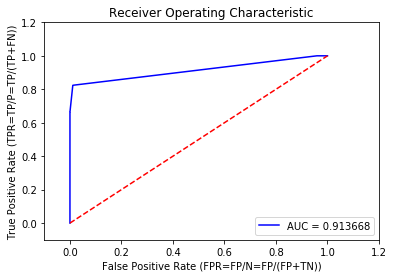

In [37]:

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_train_gini,x,x_cv, cv=5)
print("Cross-validation scores: {}".format(scores))


Cross-validation scores: [0.99873123 0.99892796 0.99902    0.99901459 0.99899112]


In [40]:
print("Average cross-validation score: {}".format(scores.mean()))

Average cross-validation score: 0.9989369800827756


In [41]:
# copy and paste the output file content at 
# http://www.webgraphviz.com/ to visualize the graph
